# How to use Mean Field Analytic Ising Model Package

In [1]:
include("MFIsingModelAnalytic.jl");
using .MFIsingAnalytic;

In this document we show how a user can get use analytic results for Ising model in the *mean field* setting. Each model consists on $N$ magentic spins all of which have a mean field interaction with one another. For each spin the change in the global Hamiltonian given that spin flips from $\sigma_i\to -\sigma_i$ is given by $\Delta H = 2\sigma_i(h + Jzm)$, where $h$ is the field strength affecting all agents, $J$ is the interaction strength from one agent to another and $z$ stores the details of the interactions. In the case where all spins are fully connected we set $z = 1$ and assume that each each spin has a $J/N$ interaction strength with each other agent. In the nearest neighbour interaction case one would set $z = 2d$, where $d$ is the spatial dimension.

We define the analytic Ising model (AIM) `struct` below.

In [100]:
N = 100; h=-0.1; J = 2.0;
im1 = AIM(h = h, J = J, N = N);

We can then access certain field of the `struct`, for example the field strength.

In [93]:
im1.h

-0.1

Using the `prob(AIM, t, ic)` function we can then output the probability distributions for the model given the AIM at a time $t$ for an initial condition `ic`, below we do this for three different times. If we don't specify the starting condition, then is assumed that the system has an initial condition with $N/2$ up spins, or else setting `ic=m::Int64` will have an initial condition starting from $m$ up spins.

In [101]:
p1 = [prob(im1, 0.1), prob(im1, 1.0), prob(im1, 10000.0)];

One can then plot the probability distributions below 

In [95]:
using Plots, LaTeXStrings

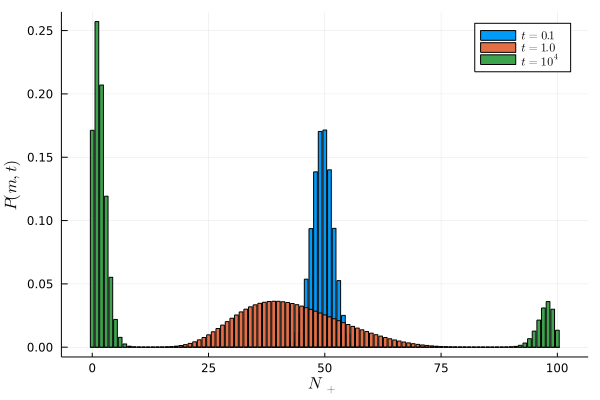

In [122]:
bar(p1, label = [L"t = 0.1" L"t = 1.0" L"t = 10^4"])
xlabel!(L"$N_+$")
ylabel!(L"$P(m,t)$")

We can also check that the sum of the probabilities sums to 1 (or very close to 1) for each distribution. 

In [111]:
sum(p1[1][2])

0.9999999999999288800476321514515950991627749878123406157004258524853115799231375

Oftentimes, the initial condition of the number of up spins is not exactly known and is itself a probability distribution. For example, a common initial condition is that each spin start as spin up with probability $p_0 = 0.5$; in which case there is an initial binomial distribution over the number of up spins. We can specify initial distributions when specifying `ic` in `prob()`.

In [117]:
using Distributions

In [114]:
p2 = prob(im1, 1.0, Binomial(N,0.5));

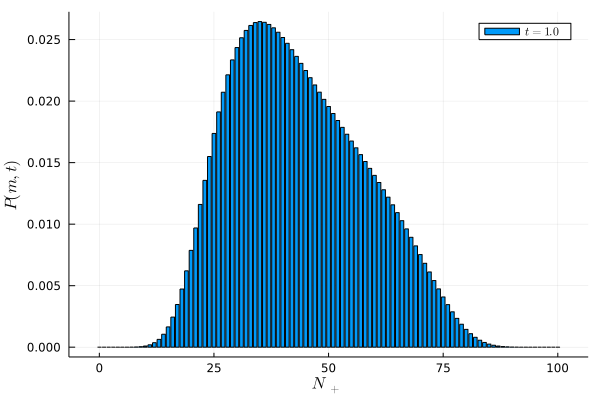

In [120]:
bar(p2, label = L"t = 1.0")
xlabel!(L"$N_+$")
ylabel!(L"$P(m,t)$")

Again check the normalisation.

In [123]:
sum(p2[2])

0.9999999999999242544138210243674044848372019727547427896902229562434654494934055

Finally, we can output the steady state distribution for an Ising model through `SSprob(AIM)`. No initial condition needs to be specified here since this is the *steady state* distribution reached as $t\to \infty$ and is hence independent of the initial condition. 

In [125]:
ps1 = SSprob(im1);

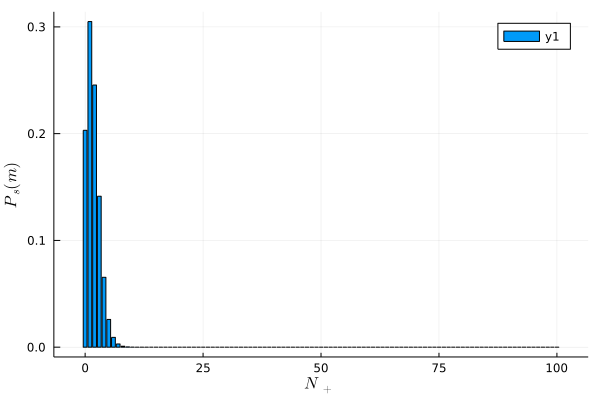

In [126]:
bar(ps1)
xlabel!(L"$N_+$")
ylabel!(L"$P_s(m)$")

And a final check of normalisation.

In [128]:
sum(ps1[2])

1.0